In [12]:
#Using tensorflow 2.10
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [13]:
adress = r'C:\Users\Lara\Downloads\house_prices.csv'
content = pd.read_csv(adress)

In [14]:
content.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
square_footage = content.iloc[:, 5:6] #todas as linhas, coluna 5, não pega o lower
house_price = content.iloc[:, 2:3] #não pega o lower

In [16]:
scaler = StandardScaler() #calcula a média e o desvio padrão dos dados fornecidos
scaled_square_footage = scaler.fit_transform(square_footage)  #transforma os dados originais
scaled_house_price = scaler.fit_transform(house_price)

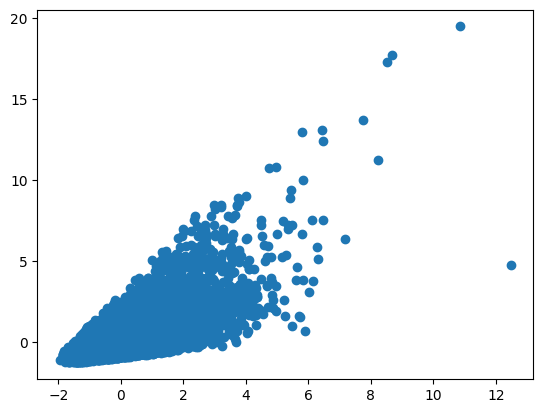

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(scaled_square_footage, scaled_house_price)

In [18]:
#Linear simples, gerando números aleatórios
b0 = tf.Variable(0.41)
b1 = tf.Variable(0.72)

In [19]:
def linear_regression(square_footage):
    return b0 + b1 * square_footage

optimizer = tf.optimizers.SGD(learning_rate=0.001) #atualiza os parâmetros de um modelo de forma a minimizar uma função de perda.
batch_size = 32

mse_values = [] 

In [20]:
for i in range(1000):
    index = np.random.randint(len(scaled_square_footage), size=batch_size) #gera números inteiros aleatórios dentro de um intervalo específico, adequando ao tamanho do batch definido 
    with tf.GradientTape() as forecast:
        pred = linear_regression(scaled_square_footage[index])
        loss = tf.reduce_mean(tf.pow(pred - scaled_house_price[index], 2)) #É o vetor de valores reais dos preços das casas, calcula a diferença entre as previsões e os valores reais
        mse_values.append(loss.numpy())
        
    gradients = forecast.gradient(loss, [b1, b0])
    optimizer.apply_gradients(zip(gradients, [b1, b0]))

forecasts = linear_regression(scaled_square_footage)

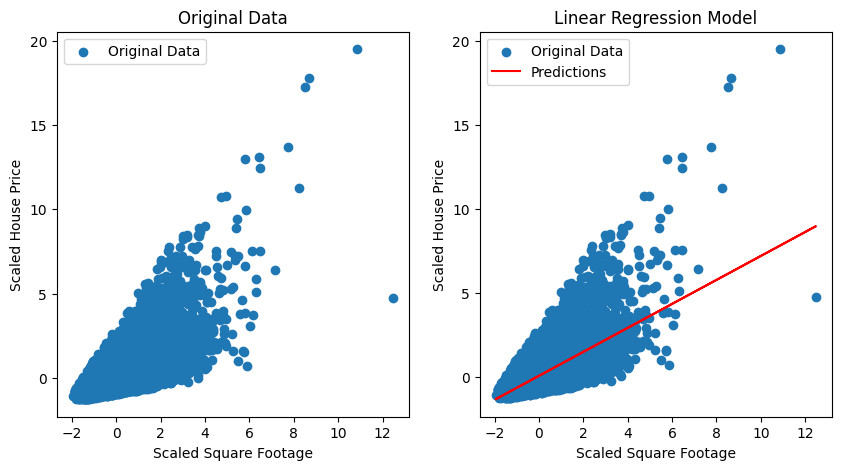

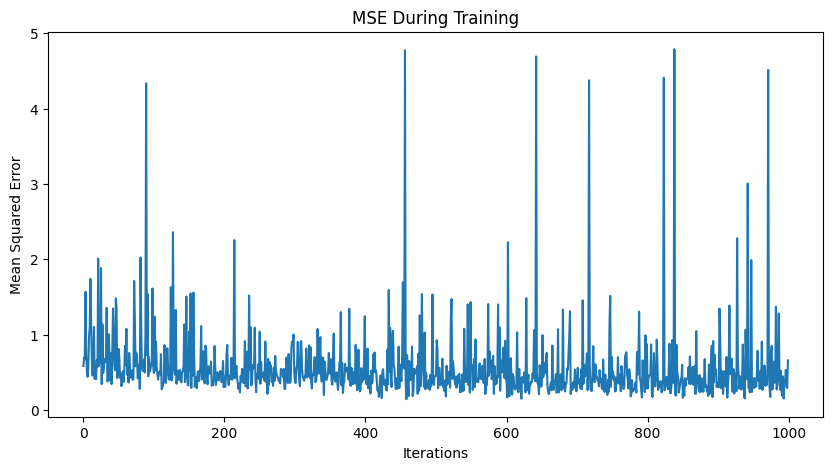

In [21]:
plt.figure(figsize=(10, 5))

# Plot the original data
plt.subplot(1, 2, 1)
plt.scatter(scaled_square_footage, scaled_house_price, label='Original Data')
plt.xlabel('Scaled Square Footage')
plt.ylabel('Scaled House Price')
plt.title('Original Data')
plt.legend()

# Plot the predictions and MSE
plt.subplot(1, 2, 2)
plt.scatter(scaled_square_footage, scaled_house_price, label='Original Data')
plt.plot(scaled_square_footage, forecasts, color='red', label='Predictions')
plt.xlabel('Scaled Square Footage')
plt.ylabel('Scaled House Price')
plt.title('Linear Regression Model')
plt.legend()

# Plot MSE values over iterations
plt.figure(figsize=(10, 5))
plt.plot(mse_values)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Training')
plt.show()